1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

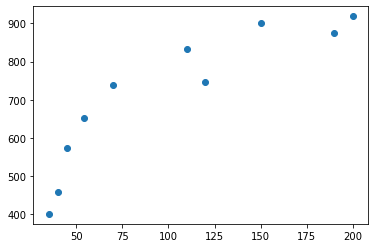

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.scatter(zp, ks)
plt.show()

def mse(y,y1,n):
    return f"mse = {((y-y1)**2).sum()/n}, rmse = {(((y-y1)**2).sum()/n)**0.5}"

с использованием intercept

In [2]:
b = (np.mean(zp*ks) - np.mean(zp)*np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
a = np.mean(ks) - b*np.mean(zp)
f"ks = {a} + {b}*zp"

'ks = 444.1773573243596 + 2.620538882402765*zp'

In [3]:
ks_int = a + b*zp
ks_int

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

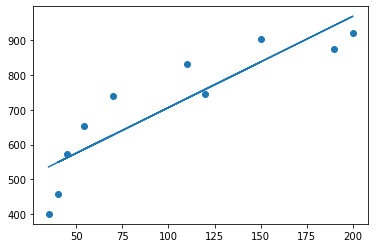

In [4]:
plt.scatter(zp, ks)
plt.plot(zp,ks_int)
plt.show()

In [5]:
mse(ks,ks_int,len(ks))

'mse = 6470.414201176658, rmse = 80.43888488272732'

без использования intercept матречным методом

In [6]:
zp_m = zp.reshape((len(zp),1))
zp_m

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [7]:
ks_m = ks.reshape((len(ks),1))
ks_m

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [8]:
b_m = np.dot(np.linalg.inv(np.dot(zp_m.T,zp_m)),zp_m.T@ks_m)[0,0]
f"ks = {b_m}*zp"

'ks = 5.889820420132688*zp'

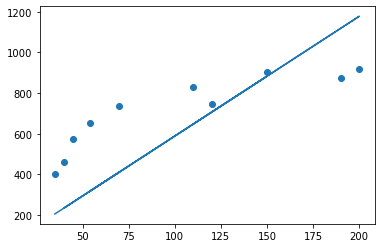

In [9]:
plt.scatter(zp, ks)
plt.plot(zp,b_m*zp)
plt.show()

In [10]:
mse(ks,b_m*zp,len(ks))

'mse = 56516.8584157194, rmse = 237.7327457792035'

ВЫВОД с intercept модель более точно описывает зависимость исходя из rmse

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [11]:
def mse_grad(b1,b0,y,x,n):
    mse = np.sum((b1*x + b0 - y)**2)/n
    rmse = (mse)**0.5
    return f"mse = {mse}, rmse = {rmse}"

In [12]:
alpha = 1e-6
b1 = 5.889
n = len(zp)

In [13]:
for i in range(100):
    b1 -= alpha*(2/n)*np.sum((b1*zp - ks)*zp)
    if i%10:    
        print(f"b1 = {b1}, {mse_grad(b1,0,ks,zp,n)}")
        

b1 = 5.8890445875544035, mse = 56516.86670807798, rmse = 237.7327632197085
b1 = 5.889065964224599, mse = 56516.86625741133, rmse = 237.73276227186554
b1 = 5.889086751899126, mse = 56516.86583123717, rmse = 237.7327613755352
b1 = 5.889106966806699, mse = 56516.86542822438, rmse = 237.73276052791795
b1 = 5.88912662472888, mse = 56516.865047114225, rmse = 237.73275972636634
b1 = 5.889145741012401, mse = 56516.86468671635, rmse = 237.73275896837683
b1 = 5.889164330581138, mse = 56516.86434590508, rmse = 237.73275825158188
b1 = 5.88918240794777, mse = 56516.86402361597, rmse = 237.73275757374282
b1 = 5.889199987225103, mse = 56516.86371884237, rmse = 237.73275693274238
b1 = 5.889233706029552, mse = 56516.86315808581, rmse = 237.73275575335808
b1 = 5.889249871880579, mse = 56516.86290035136, rmse = 237.73275521129048
b1 = 5.889265592310679, mse = 56516.86265662408, rmse = 237.73275469868278
b1 = 5.889280879592624, mse = 56516.86242614269, rmse = 237.73275421393387
b1 = 5.889295745661032, mse

методом подбора определили b1 = 5.8897 с приемлемой ошибкой 

3*. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [14]:
b1 = 2.57
alpha = 1e-8

for i in range(100):
    b1 -= alpha*(2/n)*np.sum((b1*zp - ks)*zp)
    a = np.mean(ks) - b1*np.mean(zp)
    if i%10:    
        print(f"b1 = {b1} a = {a}, {mse_grad(b1,a,ks,zp,n)}")
        

b1 = 2.5718291814862617 a = 449.11652099729304, mse = 6478.7057062250715, rmse = 80.49040754167586
b1 = 2.5727433942482283 a = 449.0238198232296, mse = 6478.397387153851, rmse = 80.48849226537823
b1 = 2.573657355115324 a = 448.9311441913061, mse = 6478.094992155529, rmse = 80.4866137451162
b1 = 2.5745710641569546 a = 448.83849409448476, mse = 6477.798516380551, rmse = 80.4847719533363
b1 = 2.5754845214425055 a = 448.7458695257299, mse = 6477.507954982475, rmse = 80.48296686245155
b1 = 2.5763977270413436 a = 448.6532704780077, mse = 6477.223303117947, rmse = 80.48119844484143
b1 = 2.5773106810228166 a = 448.56069694428635, mse = 6476.944555946735, rmse = 80.47946667285224
b1 = 2.578223383456253 a = 448.4681489175359, mse = 6476.6717086317085, rmse = 80.4777715187971
b1 = 2.5791358344109625 a = 448.37562639072837, mse = 6476.404756338829, rmse = 80.47611295495595
b1 = 2.580959982161344 a = 448.1906578088397, mse = 6475.8885174988945, rmse = 80.47290548687114
b1 = 2.581871679095539 a = 44

Аналогично методом перебора определили подходящуюю величину b1 = 2.620837924565345 a = 444.147034449074 (можно было увеличить точность, но думаю, она достаточная =) )